# Project Group 35

Members: Mathijs Kop, Roos Wentges, Irene Bosman, Sathvik Gadiraju, Sophie Pijnenburg

Student numbers: 5095433, 4869419 , 4882237, 6084435 , 4851404

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

In the recent years, fuel cost have undergone substatantial increases due to geopolitical devlopements and policy changes. The rising fuel prices becoming a prevalent concern for individuals and this could impact the human mobility behaviour. This study investigates the relationship between the increasing fual prices and the choices people make in terms of there travel behaviour, especially fuel based travelling.

Therefore, the research question in this data analysis is: 

*What relation can be found between rising fuel costs and mobility behaviour from 2018 to 2022?*

Subquestions:
- How have fuel prices developed in the considered time in the Netherlands?
- How have the mobility motives developed in the considered time in the Netherlands?
- What is the general mobility trend?
- To what extend does the location of the gas stations determine fuel price trends?

Geographical boundary: The Netherlands

Time scale:  2018-2022

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**:

**Author 2**:

**Author 3**:

# Data Used

CBS: https://opendata.cbs.nl/#/CBS/en/dataset/84710ENG/table?ts=1696337832049, \
https://opendata.cbs.nl/#/CBS/en/dataset/80416ENG/table?ts=1696337975859, \
https://opendata.cbs.nl/statline/#/CBS/en/dataset/84755ENG/table?ts=1696338796089, \
https://opendata.cbs.nl/statline/#/CBS/en/dataset/81567eng/table?ts=1698660850868. 

# Data Pipeline

From the first link we will look into distance traveled in passenger kilometres for different travel motives. 
From the second link we will look into the mean fuel prices per year, to compare with the distance traveled. The third link can be used to find the general mobility trend for the different travel motives over the years. 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
from pandas import read_csv

# Subquestion 1: How have fuel prices developed in the considered time in the Netherlands?
Fuel prices can develop a lot throughout the year and in between years, in this subquestion the variations in fuel prices is analysed. The data is retrieved from CBS and the fuel prices of Euro95, Diesel and LPG are available on a daily basis. In this question the monthly values are considered and a visualisation is made out of the available data from 2018 until 2022. The changes in fuel prices can have multiple reasons and can be explained from different perspectives, such as environmental regulations, big global events, exchange rates and political events. It is expected that the fuel prices will rise because in the past years some global events, tax rises and inflation occured which have had a significant influence on the fuel prices.


In [4]:

df = read_csv('fuelprices.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)

data = df.dropna().rename({'euro/liter':'Euro95','euro/liter.1':'Diesel', 'euro/liter.2':'LPG' }, axis=1)

data.index.names = ['Months']

data.index = pd.to_datetime(data.index)

warnings.filterwarnings("ignore", message="The argument 'infer_datetime_format' is deprecated.*", category=FutureWarning) #ignore warning

data['Average'] = data.mean(axis=1) #Add Average price 
data.head(10)

C:\Users\sophi\AppData\Local\Temp\ipykernel_20856\4097792832.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = read_csv('fuelprices.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)


,Euro95,Diesel,LPG,Average
Months,,,,
2018-01-01,1.589,1.292,0.696,1.192333
2018-02-01,1.566,1.254,0.667,1.162333
2018-03-01,1.545,1.260,0.654,1.153000
2018-04-01,1.608,1.301,0.663,1.190667
2018-05-01,1.668,1.360,0.675,1.234333
2018-06-01,1.660,1.362,0.681,1.234333
2018-07-01,1.661,1.356,0.688,1.235000
2018-08-01,1.683,1.359,0.692,1.244667
2018-09-01,1.680,1.384,0.714,1.259333


Text(0.5, 1.0, 'Fuel prices per month in the Netherlands')

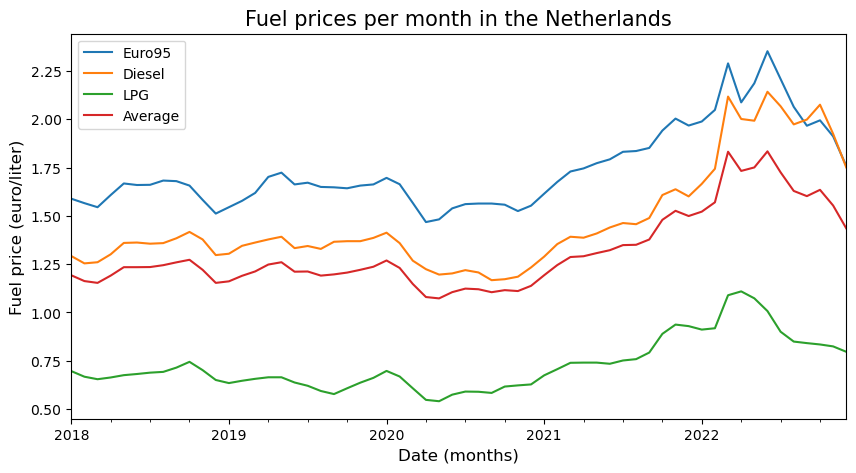

In [5]:
data.plot(figsize=(10,5))
plt.ylabel('Fuel price (euro/liter)', fontsize=12)
plt.xlabel('Date (months)', fontsize=12)
plt.title('Fuel prices per month in the Netherlands', fontsize=15)

The figure shows the change in fuel prices per month between 2018 and 2023. Until 2022 the fuel price increased for all the different types of fuel as can be concluded from the graph. The grade of the increase was almost parallel when comparing the lines of the different fuels. From 2018 to 2021, fuel prices exhibited a degree of stability, with relatively consistent pricing patterns. However, during this period, there were occassions of both lower and higher price fluctuations, indicating that the fuel market experienced variations in pricing. Between 2021 and 2022, the prices on the market increased. From 2022, all the fuel prices has been decreasing and for a couple of months the price of diesel was higher than Euro95. Overall, there can be concluded that the fuel prices differ from time to time and that the rise occurs mostly between 2021 and 2022.

In [6]:
data_yearly = data.resample('Y').mean() 
data_yearly['Average'] = data_yearly.mean(axis=1)
data.index.names = ['Year']
data_yearly['Year'] = data_yearly.index.strftime('%Y')
data_yearly = data_yearly.set_index('Year')
data_yearly.reset_index(level=0, inplace=True)
fuel_data_yearly = data_yearly
fuel_data_yearly

,Year,Euro95,Diesel,LPG,Average
0,2018,1.617667,1.335000,0.685417,1.212694
1,2019,1.647000,1.356417,0.632917,1.212111
2,2020,1.561833,1.237083,0.605000,1.134639
3,2021,1.813917,1.460583,0.782417,1.352306
4,2022,2.071917,1.954917,0.929250,1.652028


In [7]:
fuel_types = ['Euro95', 'Diesel', 'LPG', 'Average']

# Calculate Year-over-Year percentage changes for each fuel type
for fuel_type in fuel_types:
    column_name = f"{fuel_type}_YoY"
    fuel_data_yearly[column_name] = fuel_data_yearly[fuel_type].pct_change() * 100

# Insert '0' YoY change for the year 2019 (second year)
for fuel_type in fuel_types:
    column_name = f"{fuel_type}_YoY"
    fuel_data_yearly.at[0, column_name] = 0

# Create a long-form DataFrame for Plotly Express
melted_data = fuel_data_yearly.melt(id_vars='Year', value_vars=[f"{fuel_type}_YoY" for fuel_type in fuel_types], var_name='Fuel_Type', value_name='YoY_Change')
Fuel_Yoy = pivot_df = melted_data.pivot(index='Year', columns='Fuel_Type', values='YoY_Change').reset_index()

Fuel_Yoy

Fuel_Type,Year,Average_YoY,Diesel_YoY,Euro95_YoY,LPG_YoY
0,2018,0.000000,0.000000,0.000000,0.000000
1,2019,-0.048102,1.604245,1.813311,-7.659574
2,2020,-6.391512,-8.797690,-5.171018,-4.410797
3,2021,19.183783,18.066689,16.140220,29.325069
4,2022,22.163794,33.844925,14.223366,18.766642


In [9]:
# Plot the Year-over-Year changes using Plotly Express
fig = px.line(melted_data, x='Year', y='YoY_Change', color='Fuel_Type', title='Year-over-Year Fuel Price Changes')
fig.update_layout(xaxis_title='Year', yaxis_title='YoY Change (%)', legend_title='Fuel Type')
fig.show()

In this graph, It can be seen that LPG has had a slightly divergent development in terms of price in recent years. Diesel and Euro95 are going through a similar development. However, from 2021 the price of diesel has been increasing all along, possibly because of the war between Russia and Ukraine.The price of Euro95 has dropped a little, the price of LPG has experienced a significant drop.

# Subquestion 2: How have the mobility motives developed in the considered time in the Netherlands?
In this subquestion the mobility trends found in the data from the CBS is explored. The yearly data is visualised in  bar charts. First the average amount of trips per day for every vehicle combined in 2022 and after that this is also done for the years 2018 till 2022. It is expected that during covid, the travelled distances for all the travel motives have dropped, especially travelling for work. However, it is expected that after covid the travelled distance for some travel were not as high as before.


In [8]:
mobility_trips = read_csv('mobility_perday.csv', index_col = 1, skiprows = 6, delimiter = ';', usecols = [0,1,2,3,4,5,6])
mobility_trips = mobility_trips.dropna()
mobility_trips = mobility_trips.drop('Travel modes')
mobility_trips = mobility_trips.rename({'Unnamed: 0':'motive'}, axis=1)
mobility_trips

,motive,2018,2019,2020,2021,2022
Periods,,,,,,
Total,Total,2.78,2.71,2.35,2.51,2.70
Passenger car (driver),Total,0.96,0.95,0.81,0.82,0.87
Train,Total,0.08,0.08,0.03,0.03,0.05
Bike,Total,0.79,0.76,0.63,0.64,0.75
Walking,Total,0.44,0.43,0.52,0.61,0.58
Total,"Travel to/from work, (non)-daily commute",0.55,0.50,0.37,0.37,0.42
Passenger car (driver),"Travel to/from work, (non)-daily commute",0.27,0.25,0.19,0.19,0.21
Train,"Travel to/from work, (non)-daily commute",0.03,0.03,0.01,0.01,0.02
Bike,"Travel to/from work, (non)-daily commute",0.14,0.13,0.10,0.10,0.12


In [21]:
# does not work yet
years = ['2018', '2019', '2020', '2021', '2022']

mobility_trend = mobility_trips[mobility_trips['motive'] == 'Total']
mobility_trend_years = mobility_trend[years].reset_index()
melted_mobility_trend = mobility_trend_years.melt(id_vars='Periods', var_name='year', value_name='trips')

melted_mobility_trend['trips'] = melted_mobility_trend['trips'].astype(float)

figure = px.line(melted_mobility_trend, x='year', y='trips', color='Periods', width=1100, height=400)
figure.update_layout(title={
    'text': f'Average amount of trips per mode of transport per year',
    'x': 0.5
})
# figure.update_yaxes(range=[0, 3]) 
figure.show()


#Pls try plotting this after calculating YoY changes

In [22]:
#The average amount of trips per day for every vehicle combined in 2022
year = '2022'

mobility_trips_total = mobility_trips[mobility_trips.index=="Total"]
mobility_trips_motive = mobility_trips_total.set_index(['motive']).sort_values(year)
fig = px.bar(mobility_trips_motive.sort_values(year), x=year, y=mobility_trips_motive.sort_values(year).index, 
             orientation='h', color = mobility_trips_motive.sort_values(year).index, width=1100, height=400)
fig.update_layout(title={
    'text': f'Average amount of trips per day for every vehicle combined in {year}',
    'x': 0.5
}, xaxis_range=[0, 5])
fig.show()

This bar chart shows the number of trips per mobility motive. The biggest share is shopping, groceries and funshopping.

In [23]:

mobility_trips_years = mobility_trips_motive[years]
display(mobility_trips_motive)
display(mobility_trips_years)


# Melt the data to create a 'year' column
mobility_trips_years = mobility_trips_years.reset_index().melt(id_vars=['motive'], var_name='year', value_name='trips')

fig = px.bar(mobility_trips_years, x='trips', y='motive', color='motive', facet_col='year', orientation='h', hover_name='trips', width=1100, height=400)

fig.update_layout(title={
    'text': 'Average amount of trips for every vehicle combined per day from 2018 to 2022',
    'x': 0.5
})
fig.update_yaxes(title_text="Travel motives")
fig.show()

,2018,2019,2020,2021,2022
motive,,,,,
Professionally,0.07,0.11,0.07,0.08,0.08
Services/care,0.09,0.09,0.07,0.09,0.09
Attending education/courses,0.23,0.22,0.14,0.14,0.18
"Travel to/from work, (non)-daily commute",0.55,0.50,0.37,0.37,0.42
"Shopping, groceries, funshopping.",0.56,0.54,0.55,0.56,0.58
Total,2.78,2.71,2.35,2.51,2.70


,2018,2019,2020,2021,2022
motive,,,,,
Professionally,0.07,0.11,0.07,0.08,0.08
Services/care,0.09,0.09,0.07,0.09,0.09
Attending education/courses,0.23,0.22,0.14,0.14,0.18
"Travel to/from work, (non)-daily commute",0.55,0.50,0.37,0.37,0.42
"Shopping, groceries, funshopping.",0.56,0.54,0.55,0.56,0.58
Total,2.78,2.71,2.35,2.51,2.70


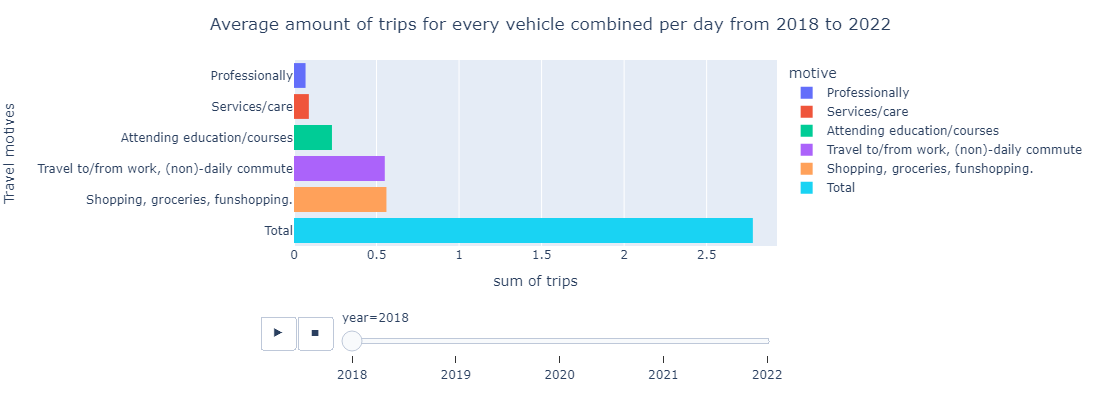

In [12]:
fig2 = px.histogram(mobility_trips_years, x='trips', y='motive', color='motive',  orientation='h',  animation_frame='year', width=1100, height=400)

fig2.update_layout(title={
    'text': 'Average amount of trips for every vehicle combined per day from 2018 to 2022',
    'x': 0.5
})

fig2.update_yaxes(title_text="Travel motives")
fig2.show()

In [24]:

mobility_trips_total_filter = mobility_trips[mobility_trips['motive'] == 'Total']

total_mobility_trips = mobility_trips_total_filter.drop(columns='motive')
total_mobility_trips

total_mobility_trips_pivot = total_mobility_trips.T
total_mobility_trips_pivot

total_mobility_trips_pivot = total_mobility_trips_pivot.astype(float)

# Calculate year-on-year change

yoy_changes = total_mobility_trips_pivot.pct_change() * 100
yoy_changes_filled = yoy_changes.fillna(0)

yoy_changes_filled

Periods,Total,Passenger car (driver),Train,Bike,Walking
2018,0.000000,0.000000,0.000000,0.000000,0.000000
2019,-2.517986,-1.041667,0.000000,-3.797468,-2.272727
2020,-13.284133,-14.736842,-62.500000,-17.105263,20.930233
2021,6.808511,1.234568,0.000000,1.587302,17.307692
2022,7.569721,6.097561,66.666667,17.187500,-4.918033


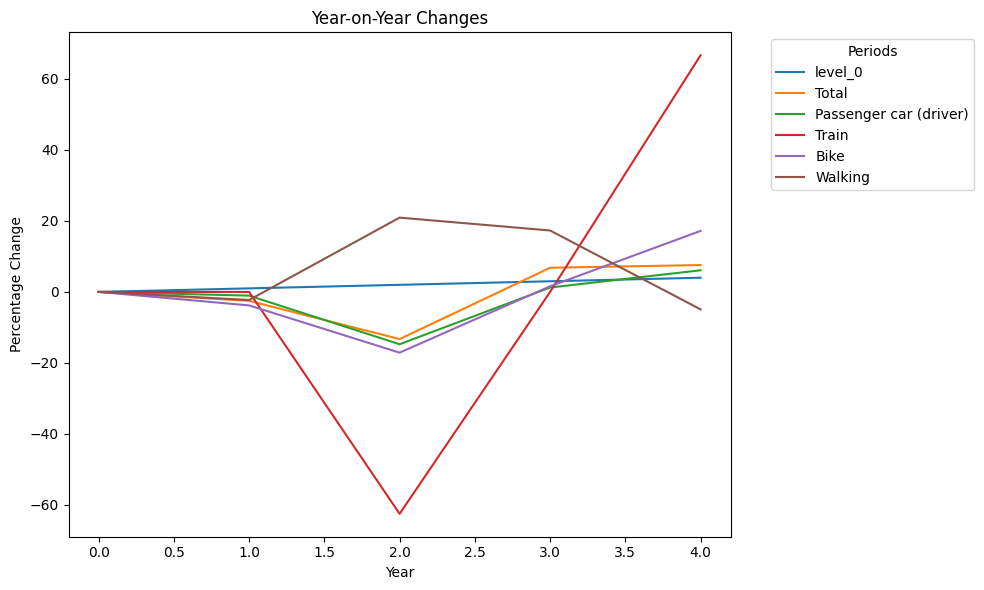

In [39]:
yoy_changes_filled.plot(kind='line', figsize=(10, 6))
plt.title('Year-on-Year Changes')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend(title='Periods', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

This bar plots the same as the previous one, but for the entire given time scale. It can be seen that for all motives a substantial drop can be seen in 2020 due to the Corona virus. But if looked at before and after the Corona virus, the motive 'shopping, groceries and funshopping' is increased, but the other substantial shares of motives have descreased.

# Subquestion 3: What is the general mobility trend?
People have started to travel more again in recent years, probably because COVID has passed, in the years during COVID more people will have traveled by car because this is private transportation and kept the chance of infection lower than traveling by public transportation. Also, since COVID, bicycle usage has increased since COVID. Furthermore, rising fuel prices are expected to make people look for alternatives, so other modes of transportation will become more attractive.


# Subquestion 4: To what extend does the location of the gas stations determine fuel price trends?
Gas station can have different locations, in this subquestion two locations are distinguished: gas stations near the highways and gas stations far away from the highways. It is investigated to what extend this location has an influence on the development of the fuel prices and how this relates to the general fuel trend. It is expected that gas station near highways have higher prices due to the convenience they offer to travelers and the associated operating costs. Additionally, factors like regional regulations, and supply and demand dynamics can influence the variation in fuel prices near highways.


In [25]:
data_highway = read_csv('highway.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)

highway = data_highway.dropna().rename({'euro/litre':'highway Euro95','euro/litre.1':'highway Diesel', 'euro/litre.2':'highway LPG' }, axis=1)

highway.index.names = ['Months']

highway.index = pd.to_datetime(data.index)
display(highway.head())

,highway Euro95,highway Diesel,highway LPG
Year,,,
2018-01-01,1.681,1.376,0.748
2018-02-01,1.657,1.336,0.717
2018-03-01,1.637,1.344,0.708
2018-04-01,1.701,1.385,0.717
2018-05-01,1.761,1.445,0.730


In [26]:
data_local = read_csv('local.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)

local = data_local.dropna().rename({'euro/litre':'local Euro95','euro/litre.1':'local Diesel', 'euro/litre.2':'local LPG' }, axis=1)

local.index.names = ['Months']

local.index = pd.to_datetime(data.index)

display(local.head())

,local Euro95,local Diesel,local LPG
Year,,,
2018-01-01,1.588,1.294,0.676
2018-02-01,1.565,1.256,0.647
2018-03-01,1.544,1.261,0.633
2018-04-01,1.606,1.303,0.642
2018-05-01,1.666,1.362,0.654


In [14]:
data_avg = read_csv('avg.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)

avg = data_avg.dropna().rename({'euro/litre':'avg Euro95','euro/litre.1':'avg Diesel', 'euro/litre.2':'avg LPG' }, axis=1)

avg.index.names = ['Months']

avg.index = pd.to_datetime(data.index)

display(avg.head())

,avg Euro95,avg Diesel,avg LPG
Year,,,
2018-01-01,1.589,1.292,0.696
2018-02-01,1.566,1.254,0.667
2018-03-01,1.545,1.260,0.654
2018-04-01,1.608,1.301,0.663
2018-05-01,1.668,1.360,0.675


In [15]:
euro95 = pd.DataFrame({'highway': highway['highway Euro95'], 'local': local['local Euro95'],'avg': avg['avg Euro95']})
diesel = pd.DataFrame({'highway': highway['highway Diesel'], 'local': local['local Diesel'],'avg': avg['avg Diesel']})
LPG = pd.DataFrame({'highway': highway['highway LPG'], 'local': local['local LPG'],'avg': avg['avg LPG']})

In [27]:
# fig95 = px.line(euro95, width=1100, height=400)
# fig95.update_layout(title={
#     'text': 'Euro95 prices',
#     'x': 0.5
# })

# fig95.update_traces(line=dict(dash='dash'), selector=dict(mode='lines+markers', marker=dict(color='red'), line=dict(color='red')))

# fig95.show()

# fig_diesel = px.line(diesel, width=1100, height=400)
# fig_diesel.update_layout(title={
#     'text': 'Diesel prices',
#     'x': 0.5
# })


# fig_diesel.show()

# fig_lpg = px.line(LPG, width=1100, height=400)
# fig_lpg.update_layout(title={
#     'text': 'LPG prices',
#     'x': 0.5
# })


# fig_lpg.show()

In the graphs above, the development of the fuel prices for each specific type of fuel over the years can be ssen. It can be seen that overall, the price of Euro95 is the highest. Also, for each type of fuel, the prices near a highway are significantly higher. The average price of Diesel and Euro95 is almost always equal to the average local fuel prices. For LPG, some difference can be seen. The average price for LPG is somewhat higher than the average local price. it is also notable that the trend of the three different fuels is about the same, but the peaks and troughs differ there type

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=highway.index, y=highway['highway Euro95'],
                    mode='lines', name='highway'))

fig.add_trace(go.Scatter(x=highway.index, y=local['local Euro95'],
                    line=dict(color='red', width=2), name='local'))

fig.add_trace(go.Scatter(x=highway.index, y=avg['avg Euro95'],
                    name='avg', line=dict( width=3, dash='dash')))

fig.update_layout(width=1100, height=400)
fig.update_layout(title={'text': 'Euro95 prices', 'x': 0.5}, xaxis_title='Month', yaxis_title='Price (euro)')

fig.show()


In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=highway.index, y=highway['highway Diesel'],
                    mode='lines', name='highway'))

fig.add_trace(go.Scatter(x=highway.index, y=local['local Diesel'],
                    line=dict(color='red', width=2), name='local'))

fig.add_trace(go.Scatter(x=highway.index, y=avg['avg Diesel'],
                    name='avg', line=dict( width=3, dash='dash')))

fig.update_layout(width=1100, height=400)
fig.update_layout(title={'text': 'Diesel prices', 'x': 0.5}, xaxis_title='Month', yaxis_title='Price (euro)')

fig.show()

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=highway.index, y=highway['highway LPG'],
                    mode='lines', name='highway'))

fig.add_trace(go.Scatter(x=highway.index, y=local['local LPG'],
                    line=dict(color='red', width=2), name='local'))

fig.add_trace(go.Scatter(x=highway.index, y=avg['avg LPG'],
                    name='avg', line=dict( width=3, dash='dash')))

fig.update_layout(width=1100, height=400)
fig.update_layout(title={'text': 'LPG prices', 'x': 0.5}, xaxis_title='Month', yaxis_title='Price (euro)')

fig.show()